In [2]:
import pandas as pd
import numpy as np
import sklearn.model_selection as sk_ms
import warnings
warnings.filterwarnings('ignore')

# data visualization
import matplotlib
import seaborn as sns
%matplotlib inline

from tqdm import tqdm

import pandas as pd
import numpy as np
from numpy import median

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.manifold import TSNE
from sklearn import preprocessing

from collections import Counter

import string
import re
from nltk.corpus import stopwords

import scipy
from scipy import hstack


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from sklearn.linear_model import Ridge

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import log_loss

from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
# from sklearn.feature_selection.univariate_selection import SelectKBest, f_regression

C:\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_excel('Airbnb.xlsx')

In [5]:
df_train, df_test = sk_ms.train_test_split(df, train_size = 0.8, random_state = 100)

# EDA

## 1. Getting insights about the dataset

`Airbnb` is a cross-sectional dataset about the detailed listings in Manhattan, New York.

The training set `df_train` is a subset of `Airbnb` containing 13477 entries and 29 columns (28 independent variables and 1 dependent variable `price`).

In [6]:
df_train.shape

(13477, 29)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13477 entries, 8018 to 5640
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              13477 non-null  int64         
 1   name                            13469 non-null  object        
 2   description                     13250 non-null  object        
 3   neighborhood_overview           7485 non-null   object        
 4   host_response_time              8617 non-null   object        
 5   host_response_rate              8617 non-null   float64       
 6   host_acceptance_rate            9138 non-null   float64       
 7   host_is_superhost               13456 non-null  object        
 8   host_total_listings_count       13439 non-null  float64       
 9   host_has_profile_pic            13439 non-null  object        
 10  host_identity_verified          13439 non-null  object        
 11  

### Numerical variables

In [8]:
num_feat = df_train.select_dtypes(exclude = ['object']).columns
num_feat

Index(['id', 'host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'availability_60',
       'number_of_reviews', 'last_review', 'review_scores_rating',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [9]:
df_train.describe()

,id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,availability_60,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
count,1.347700e+04,8617.000000,9138.000000,13439.000000,13477.000000,13477.000000,13477.000000,11457.000000,13192.000000,13477.000000,13477.000000,13477.000000,13477.000000,10141.000000,13477.000000,10141.000000
mean,1.048375e+17,0.924731,0.817480,184.837413,40.764104,-73.976855,2.917637,1.329929,1.583763,265.185820,22.003562,13.237145,22.523559,4.588130,25.466573,1.079694
std,2.373610e+17,0.174239,0.261851,843.465346,0.036879,0.023177,1.844677,0.676371,0.994544,472.560214,38.698327,18.973924,56.522064,0.788018,75.623240,2.503592
min,2.595000e+03,0.000000,0.000000,1.000000,40.701040,-74.058230,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.010000
25%,1.408002e+07,0.940000,0.742500,1.000000,40.733960,-73.993290,2.000000,1.000000,1.000000,108.000000,3.000000,0.000000,1.000000,4.520000,1.000000,0.110000
50%,3.720057e+07,1.000000,0.940000,3.000000,40.759700,-73.981850,2.000000,1.000000,1.000000,175.000000,30.000000,1.000000,4.000000,4.810000,1.000000,0.380000
75%,5.176999e+07,1.000000,1.000000,14.000000,40.790850,-73.956410,4.000000,1.000000,2.000000,295.000000,30.000000,24.000000,18.000000,5.000000,8.000000,1.360000
max,7.095955e+17,1.000000,1.000000,6958.000000,40.876630,-73.907210,16.000000,9.000000,16.000000,16500.000000,1250.000000,60.000000,1480.000000,5.000000,453.000000,123.000000


### Categorical variables

In [10]:
cat_feat = df_train.select_dtypes(include = ['object']).columns
cat_feat

Index(['name', 'description', 'neighborhood_overview', 'host_response_time',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'room_type',
       'bathrooms_text', 'amenities'],
      dtype='object')

In [11]:
df_train.describe(include='object')

,name,description,neighborhood_overview,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,bathrooms_text,amenities
count,13469,13250,7485,8617,13456,13439,13439,13477,13477,13477,13432,13477
unique,13108,11791,5719,4,2,2,2,34,1,4,28,10864
top,Water View King Bed Hotel Room,Welcome to UNTITLED (Adj.) at 3 Freeman Alley!...,Heading into NYC or exploring the NY metro are...,within an hour,f,t,t,Harlem,Manhattan,Entire home/apt,1 bath,"[""Long term stays allowed""]"
freq,25,50,71,5335,11315,13313,11560,1500,13477,8690,8142,60


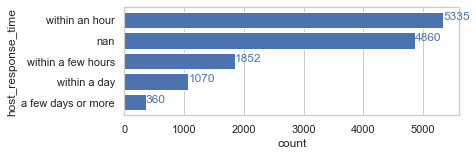

In [12]:
# Plot the distribution of host_response_time
x = df_train['host_response_time'].value_counts(dropna = False).index.fillna(value = 'nan')
y = df_train['host_response_time'].value_counts(dropna = False).values

plt.figure(figsize=[6,2])
plt.barh(x, y)
for i, val in enumerate(y):
           plt.annotate(val, (y[i], x[i]), color='b')
plt.gca().invert_yaxis()
plt.ylabel('host_response_time')
plt.xlabel('count')
plt.grid(False, axis='y')
plt.show()

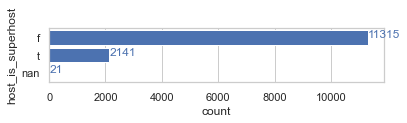

In [13]:
# Plot the distribution of host_is_superhost
x = df_train['host_is_superhost'].value_counts(dropna = False).index.fillna(value = 'nan')
y = df_train['host_is_superhost'].value_counts(dropna = False).values

plt.figure(figsize=[6,1])
plt.barh(x, y)
for i, val in enumerate(y):
           plt.annotate(val, (y[i], x[i]), color='b')
plt.gca().invert_yaxis()
plt.ylabel('host_is_superhost')
plt.xlabel('count')
plt.grid(False, axis='y')
plt.show()

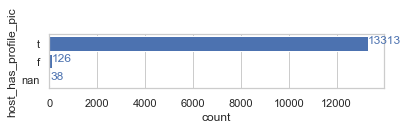

In [14]:
# Plot the distribution of host_has_profile_pic
x = df_train['host_has_profile_pic'].value_counts(dropna = False).index.fillna(value = 'nan')
y = df_train['host_has_profile_pic'].value_counts(dropna = False).values

plt.figure(figsize=[6,1])
plt.barh(x, y)
for i, val in enumerate(y):
           plt.annotate(val, (y[i], x[i]), color='b')
plt.gca().invert_yaxis()
plt.ylabel('host_has_profile_pic')
plt.xlabel('count')
plt.grid(False, axis='y')
plt.show()

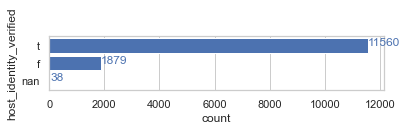

In [15]:
# Plot the distribution of host_identity_verified
x = df_train['host_identity_verified'].value_counts(dropna = False).index.fillna(value = 'nan')
y = df_train['host_identity_verified'].value_counts(dropna = False).values

plt.figure(figsize=[6,1])
plt.barh(x, y)
for i, val in enumerate(y):
           plt.annotate(val, (y[i], x[i]), color='b')
plt.gca().invert_yaxis()
plt.ylabel('host_identity_verified')
plt.xlabel('count')
plt.grid(False, axis='y')
plt.show()

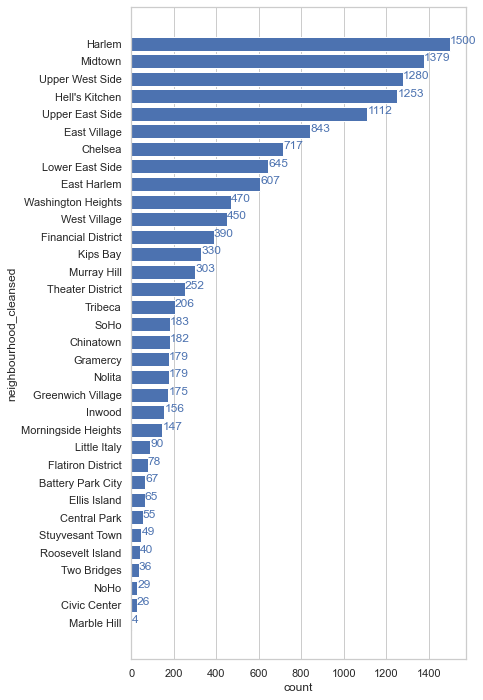

In [16]:
# Plot the distribution of neighbourhood_cleansed
x = df_train['neighbourhood_cleansed'].value_counts().index.fillna(value = 'nan')
y = df_train['neighbourhood_cleansed'].value_counts().values

plt.figure(figsize=[6,12])
plt.barh(x, y)
for i, val in enumerate(y):
           plt.annotate(val, (y[i], x[i]), color='b')
plt.gca().invert_yaxis()
plt.ylabel('neighbourhood_cleansed')
plt.xlabel('count')
plt.grid(False, axis='y')
plt.show()

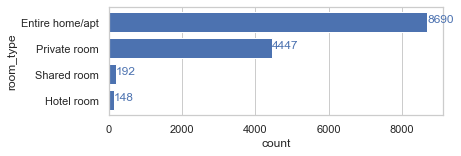

In [17]:
# Plot the distribution of room_type
x = df_train['room_type'].value_counts(dropna = False).index.fillna(value = 'nan')
y = df_train['room_type'].value_counts(dropna = False).values

plt.figure(figsize=[6,2])
plt.barh(x, y)
for i, val in enumerate(y):
           plt.annotate(val, (y[i], x[i]), color='b')
plt.gca().invert_yaxis()
plt.ylabel('room_type')
plt.xlabel('count')
plt.grid(False, axis='y')
plt.show()

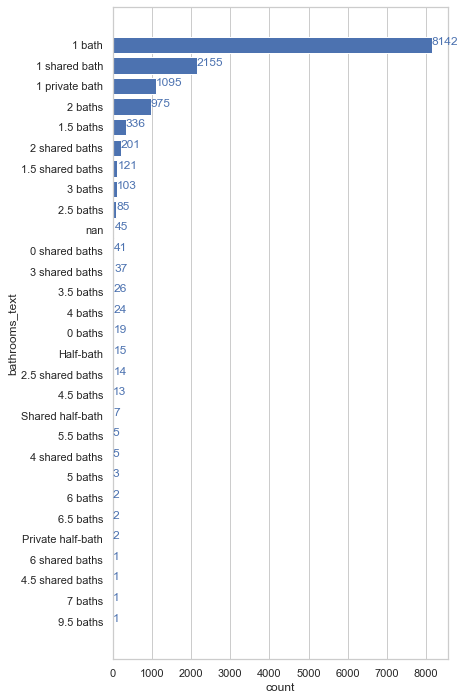

In [18]:
# Plot the distribution of host_response_time
x = df_train['bathrooms_text'].value_counts(dropna = False).index.fillna(value = 'nan')
y = df_train['bathrooms_text'].value_counts(dropna = False).values

plt.figure(figsize=[6,12])
plt.barh(x, y)
for i, val in enumerate(y):
           plt.annotate(val, (y[i], x[i]), color='b')
plt.gca().invert_yaxis()
plt.ylabel('bathrooms_text')
plt.xlabel('count')
plt.grid(False, axis='y')
plt.show()

## 2. Univariate data analysis

### The distribution of price

In [19]:
df_train['price'].describe()

count    13477.000000
mean       265.185820
std        472.560214
min          0.000000
25%        108.000000
50%        175.000000
75%        295.000000
max      16500.000000
Name: price, dtype: float64

The price is right skewed with a heavy tail.

There are some listings with extremely high price.

<AxesSubplot:xlabel='price', ylabel='Density'>

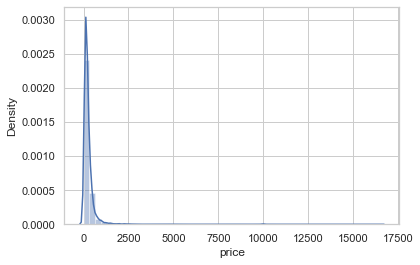

In [20]:
sns.distplot(df_train['price'])

In [21]:
print("Skewness: %f" % df_train['price'].skew())
print("Kurtosis: %f" % df_train['price'].kurt())

Skewness: 15.838917
Kurtosis: 365.167694


Excluding extremely high (>= 1000) prices

In [22]:
print("There are %.2f%% listings with price over 1000." % (df_train[df_train['price'] >= 1000].shape[0]/df_train.shape[0]*100))

There are 2.39% listings with price over 1000.


<AxesSubplot:xlabel='price', ylabel='Density'>

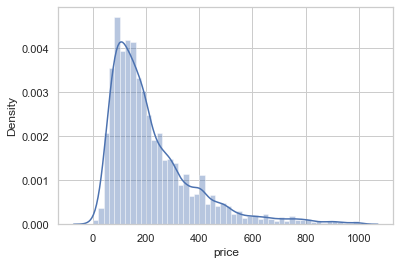

In [23]:
sns.distplot(df_train[df_train['price'] < 1000]['price'])

In [24]:
print("Skewness: %f" % df_train[df_train['price'] < 1000]['price'].skew())
print("Kurtosis: %f" % df_train[df_train['price'] < 1000]['price'].kurt())

Skewness: 1.780788
Kurtosis: 3.726025


## 3. Bivariate Data Analysis

### Numerical variables & price

In [25]:
# Filtering out the numerical features in a different data frame
df_train_num = df_train[num_feat]
df_train_num.head()

,id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,availability_60,number_of_reviews,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month
8018,36593724,1.0,0.99,1.0,40.76335,-73.95014,2,1.0,1.0,110.0,3,12,82,2022-09-04,4.91,1,2.15
16103,707931282904644992,1.0,1.00,4.0,40.74846,-73.99047,2,NaN,1.0,265.0,1,40,0,NaT,NaN,3,NaN
12780,52996659,1.0,1.00,5.0,40.78336,-73.97812,2,1.0,1.0,109.0,1,2,70,2022-08-30,4.80,2,6.89
6110,24709525,NaN,NaN,1.0,40.80753,-73.95774,2,1.0,1.0,135.0,30,0,21,2019-09-07,4.90,1,0.40
8997,41048204,NaN,NaN,5.0,40.77783,-73.95476,4,1.0,3.0,85.0,30,0,2,2020-01-05,4.00,1,0.06


In [46]:
# Correlation between numerical variables and price
df_corr = df_train_num.corr()['price'][:-1]
corr_feat = df_corr.sort_values(ascending = False)
corr_feat

price                             1.000000
accommodates                      0.329885
bedrooms                          0.291433
beds                              0.269801
availability_60                   0.199024
host_total_listings_count         0.116074
id                                0.059996
calculated_host_listings_count    0.053574
review_scores_rating              0.022199
host_acceptance_rate              0.008897
host_response_rate               -0.010202
number_of_reviews                -0.034931
minimum_nights                   -0.042126
longitude                        -0.120971
latitude                         -0.123605
Name: price, dtype: float64

After excluding extremely high (>= 1000) prices, the correlation between numerical variables and price increases.

Overall speaking, the correlation between numerical variables and price are not high. 

Number of `accommodates`, `bedrooms`, and `beds` have relatively high correlation with price. 

In [47]:
# Correlation between numerical variables and price after excluding extremely high (>= 1000) prices
df_corr = df_train[df_train['price'] < 1000][num_feat].corr()['price'][:-1]
corr_feat = df_corr.sort_values(ascending = False)
corr_feat

price                             1.000000
accommodates                      0.466240
bedrooms                          0.382434
beds                              0.358762
availability_60                   0.307270
host_total_listings_count         0.276482
calculated_host_listings_count    0.225166
id                                0.127335
host_acceptance_rate              0.094722
host_response_rate                0.073439
review_scores_rating              0.052820
number_of_reviews                -0.028948
minimum_nights                   -0.109918
latitude                         -0.269288
longitude                        -0.273483
Name: price, dtype: float64

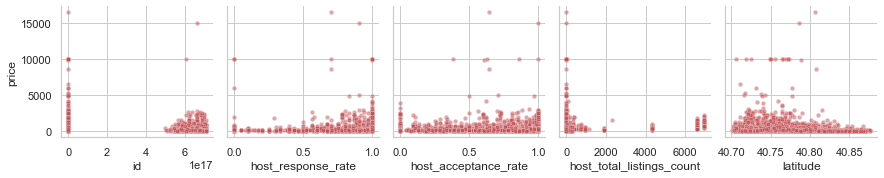

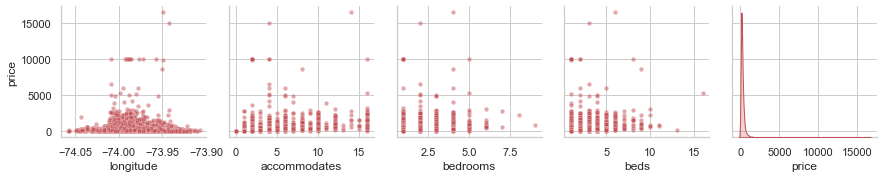

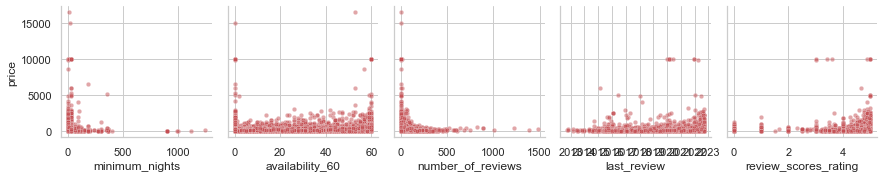

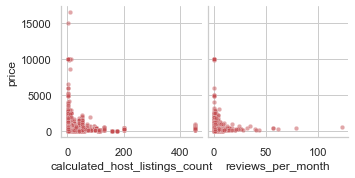

In [38]:
# Plotting all numerical variables against price
for i in range(0, len(df_train_num.columns), 5):
    sns.pairplot(data = df_train_num,
                 x_vars = df_train_num.columns[i:i+5],
                 y_vars = ['price'],
                 plot_kws=dict(s=20,edgecolor="w",color="r",alpha=.5),
                 diag_kind="kde",
                 diag_kws=dict(shade=True,color="r"))

In [29]:
df_train_num_2 = df_train[df_train['price'] < 1000][num_feat]

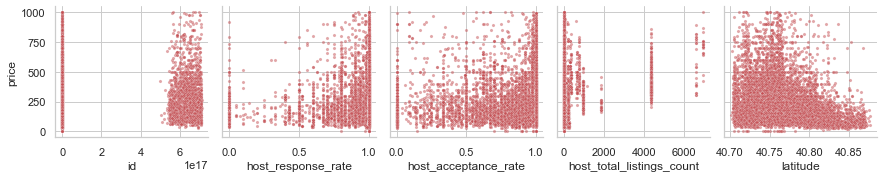

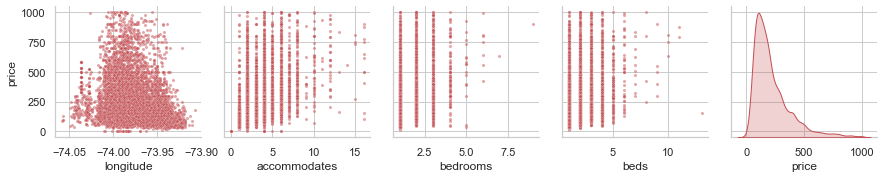

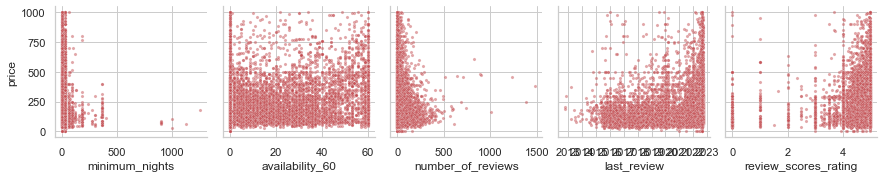

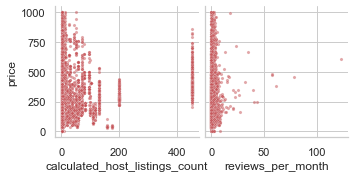

In [43]:
# Plotting all numerical variables against price
for i in range(0, len(df_train_num_2.columns), 5):
    sns.pairplot(data = df_train_num_2,
                 x_vars = df_train_num_2.columns[i:i+5],
                 y_vars = ['price'],
                 plot_kws=dict(s=10,edgecolor="w",color="r",alpha=.5),
                 diag_kind="kde",
                 diag_kws=dict(shade=True,color="r"))

### Categorical variables & price

In [29]:
# Filtering out the categorical features in a different data frame
cat_feat = df_train.select_dtypes(include = ['object']).columns
cat_feat

Index(['name', 'description', 'neighborhood_overview', 'host_response_time',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'room_type',
       'bathrooms_text', 'amenities'],
      dtype='object')

In [30]:
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':12}, color='white')

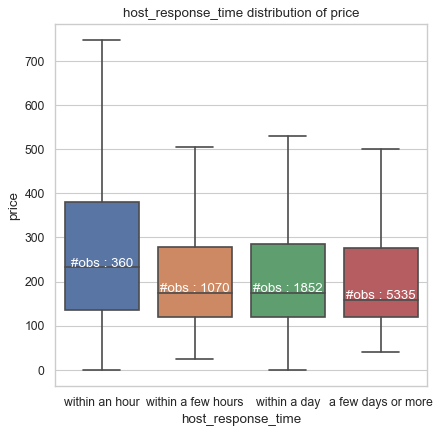

In [31]:
# Plot the variation of price with the host_response_time
plt.figure(figsize=(6,6), dpi= 80)
sns.boxplot(x = 'host_response_time', y='price', data=df_train, showfliers=False)

add_n_obs(df_train,group_col='host_response_time',y='price') 

plt.title('host_response_time distribution of price')
plt.show()

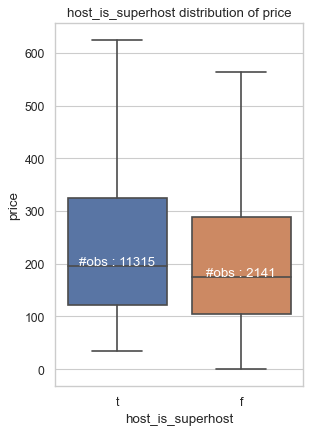

In [32]:
# Plot the variation of price with the host_is_superhost
plt.figure(figsize=(4,6), dpi= 80)
sns.boxplot(x = 'host_is_superhost', y='price', data=df_train, showfliers=False)

add_n_obs(df_train,group_col='host_is_superhost',y='price') 

plt.title('host_is_superhost distribution of price')
plt.show()

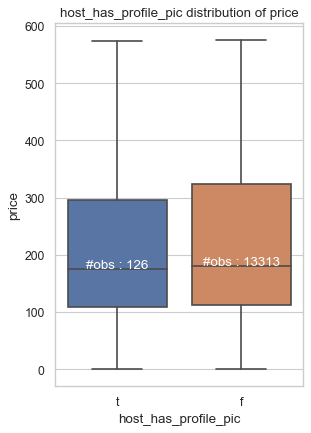

In [33]:
# Plot the variation of price with the host_has_profile_pic
plt.figure(figsize=(4,6), dpi= 80)
sns.boxplot(x = 'host_has_profile_pic', y='price', data=df_train, showfliers=False)

add_n_obs(df_train,group_col='host_has_profile_pic',y='price') 

plt.title('host_has_profile_pic distribution of price')
plt.show()

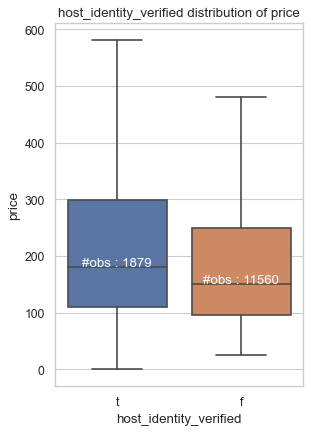

In [34]:
# Plot the variation of price with the host_identity_verified
plt.figure(figsize=(4,6), dpi= 80)
sns.boxplot(x = 'host_identity_verified', y='price', data=df_train, showfliers=False)

add_n_obs(df_train,group_col='host_identity_verified',y='price') 

plt.title('host_identity_verified distribution of price')
plt.show()

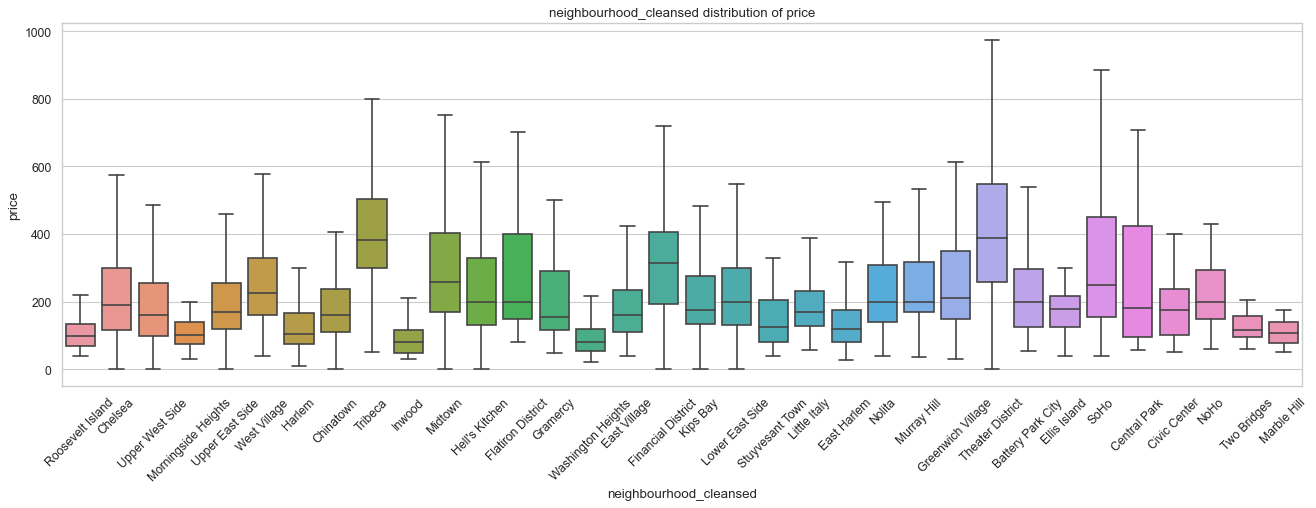

In [37]:
# Plot the variation of price with the host_identity_verified
plt.figure(figsize=(20,6), dpi= 80)
sns.boxplot(x = 'neighbourhood_cleansed', y='price', data=df_train, showfliers=False)
plt.xticks(rotation=45)

# add_n_obs(df_train,group_col='neighbourhood_cleansed',y='price') 

plt.title('neighbourhood_cleansed distribution of price')
plt.show()

In [ ]:
# Plot the variation of price with the host_identity_verified
plt.figure(figsize=(20,6), dpi= 80)
sns.boxplot(x = 'neighbourhood_cleansed', y='price', data=df_train, showfliers=False)
plt.xticks(rotation=45)

# add_n_obs(df_train,group_col='neighbourhood_cleansed',y='price') 

plt.title('neighbourhood_cleansed distribution of price')
plt.show()

## 4. Multivariate Data Analysis

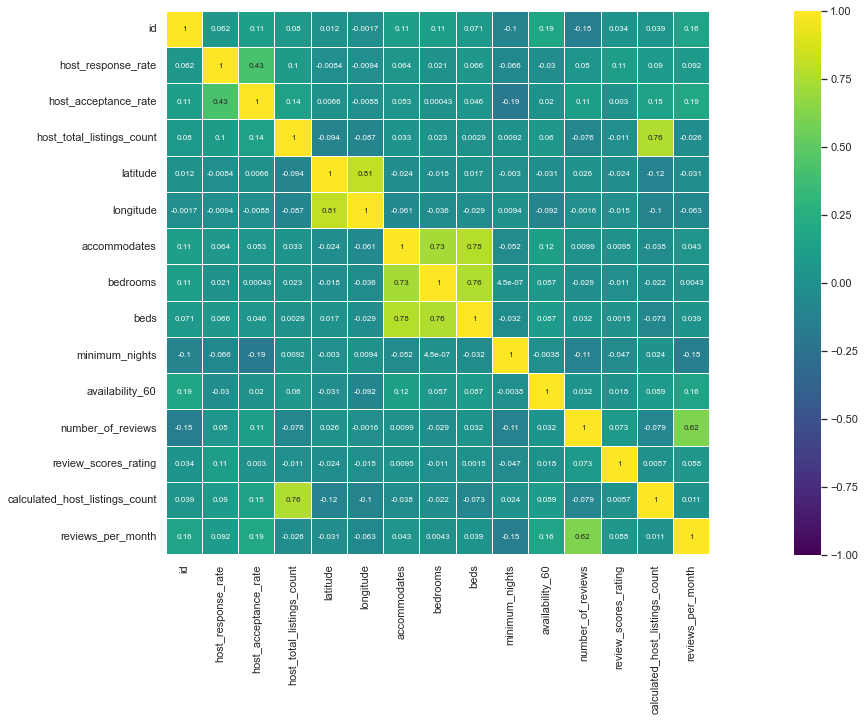

In [113]:
# Plot the correlation between numerical variables
corr = df_train_num.drop('price', axis=1).corr() # We already examined price correlations
plt.figure(figsize=(30, 10))
sns.heatmap(corr,
cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
annot=True, annot_kws={"size": 8}, square=True);

## 5. Cleaning the data: Pre-processing

### 5.1. Pre-processing text features

In [280]:
text = df_train[['name', 'description', 'neighborhood_overview', 'bathrooms_text', 'amenities']]
text.head()

,name,description,neighborhood_overview,bathrooms_text,amenities
8018,An Island Apartment in New York City,My apartment is a very comfortable to reside ....,Roosevelt Island is unique because it is an Is...,1 private bath,"[""First aid kit"", ""Body soap"", ""Microwave"", ""S..."
16103,Large studio room with kitchen across penn sta...,Welcome Stewart Hotel<br /><br />Just right fo...,NaN,1 bath,"[""Body soap"", ""Microwave"", ""Stove"", ""Coffee ma..."
12780,Very nice clean private room in upper West side,Very peaceful and a good place to get some res...,NaN,1.5 shared baths,"[""Room-darkening shades"", ""Wifi"", ""Essentials""..."
6110,"Near Columbia, 1/A/C/B/D train, entire one bed...",Quiet and cozy one-bedroom apartment in the Up...,NaN,1 bath,"[""Stove"", ""Coffee maker"", ""Long term stays all..."
8997,Big One Bedroom-full apartment- Upper East Side,Beautiful one bedroom apartment in the heart o...,NaN,1 bath,"[""Hair dryer"", ""Essentials"", ""Heating"", ""Shamp..."


#### name

#### amenities

In [279]:
amenities_dict = {}
for i in df_train.index:
    
    # Replace the '//...' pattern in the amenities column with whitespace
    cleaned = re.compile('\s?\\\\.*?\s').sub(' ',df_train.loc[i, 'amenities'])
    
    # Get rid of the space in the beginning and the end
    amenities_dict[df_train.loc[i, 'id']] = re.split(r"\[\"|\"\]|\"\,\s\"", cleaned)[1:-1]
    
# amenities_dict

In [278]:
amenities_count = {}
for i in amenities_dict.values():
    for j in i:
        if amenities_count.get(j):
            amenities_count[j] += 1
        else:
            amenities_count[j] = 1
            
# amenities_count
sorted(amenities_count.items(), key=lambda x: x[1], reverse=True)[:20]

[('Wifi', 12763),
 ('Long term stays allowed', 12546),
 ('Smoke alarm', 12036),
 ('Essentials', 11609),
 ('Kitchen', 11589),
 ('Heating', 10803),
 ('Air conditioning', 10428),
 ('Carbon monoxide alarm', 10047),
 ('Hangers', 9970),
 ('Hair dryer', 9179),
 ('Iron', 8808),
 ('Shampoo', 8280),
 ('Hot water', 8139),
 ('TV', 6864),
 ('Refrigerator', 6660),
 ('Dishes and silverware', 6635),
 ('Bed linens', 6077),
 ('Cooking basics', 5993),
 ('Microwave', 5796),
 ('Coffee maker', 5561)]

In [274]:
df_train_process = df_train.copy()
df_train_process['ame_len'] = df_train_process['amenities'].apply(lambda x: len(re.split(r"\[\"|\"\]|\"\,\s\"", 
                                                                                         re.compile('\s?\\\\.*?\s').sub(' ',x)))-2)

In [277]:
df_train_process[['ame_len','price']].corr()

,ame_len,price
ame_len,1.000000,0.090828
price,0.090828,1.000000


In [ ]:
### 5.1. Pre-processing text features

Based on my intuition and research on existing approaches, I came up with the following features that I thought would be useful in determining the price of an item.

## 6. Handling Missing Values

In [ ]:
percent_missing_row = df.isnull().T.sum() * 100 / 29
missing_row = pd.DataFrame({'Percent Missing': percent_missing_row})

drop_rows = missing_row[missing_row['Percent Missing'] > 20].index.tolist()
# missing_values

In [ ]:
df_new = df.drop(drop_rows)
df_new.shape

In [ ]:
percent_missing_col = df_new.isnull().sum() * 100 / len(df_new)
missing_col = pd.DataFrame({'Percent Missing': percent_missing_col})
missing_col

## 7. Mapping

In [ ]:
# df_map = pd.read_excel("Airbnb.xlsx")
# df_map.head()

,id,name,description,neighborhood_overview,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,availability_60,number_of_reviews,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month
0,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,within a day,0.75,0.23,f,9.0,t,t,Midtown,Manhattan,40.75356,-73.98559,Entire home/apt,1,1 bath,NaN,1.0,"[""Stove"", ""Coffee maker"", ""Long term stays all...",175.0,30,0,49,2022-06-21,4.68,3,0.31
1,5178,Large Furnished Room Near B'way銆,Please don鈥檛 expect the luxury here just a bas...,"Theater district, many restaurants around here.",within a few hours,1.00,1.00,f,1.0,t,f,Midtown,Manhattan,40.76457,-73.98317,Private room,2,1 bath,1.0,1.0,"[""Body soap"", ""Microwave"", ""Laundromat nearby""...",68.0,2,4,550,2022-08-22,4.23,1,3.39
2,80493,Cozy room in East Village with AC,This room is up three flights of stairs - it's...,"People are easy going here, they're not in suc...",within an hour,1.00,0.86,f,1.0,t,t,East Village,Manhattan,40.72322,-73.98615,Private room,2,1.5 shared baths,1.0,2.0,"[""Essentials"", ""Oven"", ""Cable TV"", ""Refrigerat...",55.0,2,0,207,2022-08-13,4.34,1,1.49
3,45936,Couldn't Be Closer To Columbia Uni,<b>The space</b><br />Hi and Thank you for che...,NaN,within a day,0.50,0.86,f,2.0,t,t,Morningside Heights,Manhattan,40.80630,-73.95985,Private room,2,1 shared bath,1.0,1.0,"[""Breakfast"", ""Cable TV"", ""Elevator"", ""Heating...",75.0,31,0,135,2022-07-11,4.65,1,0.95
4,5203,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,NaN,NaN,NaN,f,5.0,t,t,Upper West Side,Manhattan,40.80380,-73.96751,Private room,1,1 shared bath,1.0,1.0,"[""Hair dryer"", ""Essentials"", ""Breakfast"", ""Ele...",75.0,2,0,118,2017-07-21,4.91,1,0.75


In [ ]:
# df_map = df_map[["id","name","neighbourhood_cleansed","latitude","longitude","price"]]
# df_map.head()

,id,name,neighbourhood_cleansed,latitude,longitude,price
0,2595,Skylit Midtown Castle,Midtown,40.75356,-73.98559,175.0
1,5178,Large Furnished Room Near B'way銆,Midtown,40.76457,-73.98317,68.0
2,80493,Cozy room in East Village with AC,East Village,40.72322,-73.98615,55.0
3,45936,Couldn't Be Closer To Columbia Uni,Morningside Heights,40.80630,-73.95985,75.0
4,5203,Cozy Clean Guest Room - Family Apt,Upper West Side,40.80380,-73.96751,75.0


In [ ]:
# # get zip code from longtitue & latitude
# import geopy
# def convert_zip(df,geolocator,lat,lon):
#     location = geolocator.reverse((df[lat],df[lon]))
#     if "postcode" in location.raw["address"]:
#         return location.raw["address"]["postcode"]
#     else:
#         return -9999

# geolocator = geopy.Nominatim(user_agent="my-appication")
# zipcodes = df_map[["latitude","longitude"]].apply(convert_zip,axis=1,geolocator=geolocator,lat="latitude",lon="longitude")
# zipcodes.head()

0    10019
1    10019
2    10009
3    10025
4    10025
dtype: object

In [ ]:
# df_map["ZIP"] = zipcodes
# df_map.to_excel("Airbnb_mapping.xlsx",index=True)
df_map = pd.read_excel("Airbnb_mapping.xlsx")

In [ ]:
df_map = df_map[df_map["ZIP"]!=-9999]

In [ ]:
# mean prices for each ZIP code
price_mean_by_zip = pd.DataFrame(df_map.groupby("ZIP").mean()["price"])
price_mean_by_zip.reset_index(level=0,inplace=True)
# price_mean_by_zip["price_visualize"] = -price_mean_by_zip["price"]
price_mean_by_zip.head()

,ZIP,price
0,07010,167.600000
1,07020,173.240000
2,07022,177.500000
3,07024,115.000000
4,07030,246.869565


In [ ]:
import folium
m_price = folium.Map(location = [40.7589,-73.9851],zoom_start=12)
m_price.choropleth(geo_data='zipcode.geojson', data=price_mean_by_zip,
             columns=[ 'ZIP','price'],
             key_on='feature.properties.postalCode',
             fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Distribution of Mean Prices')
folium.LayerControl().add_to(m_price)
m_price

/opt/anaconda3/lib/python3.8/site-packages/folium/folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [ ]:
sizes_by_zip = pd.DataFrame(df_map.groupby("ZIP").size())
sizes_by_zip.rename(columns={0:"size"},inplace=True)
sizes_by_zip.reset_index(level=0,inplace=True)
# price_mean_by_zip["price_visualize"] = -price_mean_by_zip["price"]
sizes_by_zip.head()

,ZIP,size
0,07010,5
1,07020,25
2,07022,14
3,07024,2
4,07030,138


In [ ]:
min(sizes_by_zip["size"])

1

In [ ]:
import folium
m_size = folium.Map(location = [40.7589,-73.9851],zoom_start=12)
m_size.choropleth(geo_data='zipcode.geojson', data=sizes_by_zip,
             columns=[ 'ZIP','size'],
             key_on='feature.properties.postalCode',
             fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Distribution of Sizes')
folium.LayerControl().add_to(m_size)
m_size

8. Convert Categorical data items into numerical data items.

9. Scaling the data

10. Training Model on this data.

https://medium.com/@srajangupta5/the-best-beginners-guide-to-exploratory-data-analysis-eda-the-only-guide-you-will-ever-need-4409e6be4423

https://towardsdatascience.com/mercari-price-suggestion-97ff15840dbd

https://github.com/aruns2120/Mercari-Price-Suggestion-Challenge/blob/master/Mercari_PriceSuggestion_EDA.ipynb